<a href="https://colab.research.google.com/github/rafibarash/hands_on_ml/blob/master/02_End_To_End_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main steps of real life ML project

1. Look at the big picture
2. Get data
3. Discover and visualize data to gain insights
4. Prepare data for ML algorithms
5. Select model and train it
6. Fine tune model
7. Present solutino
8. Launch, monitor, and maintain system

In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

URL = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

housing = pd.read_csv(URL)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


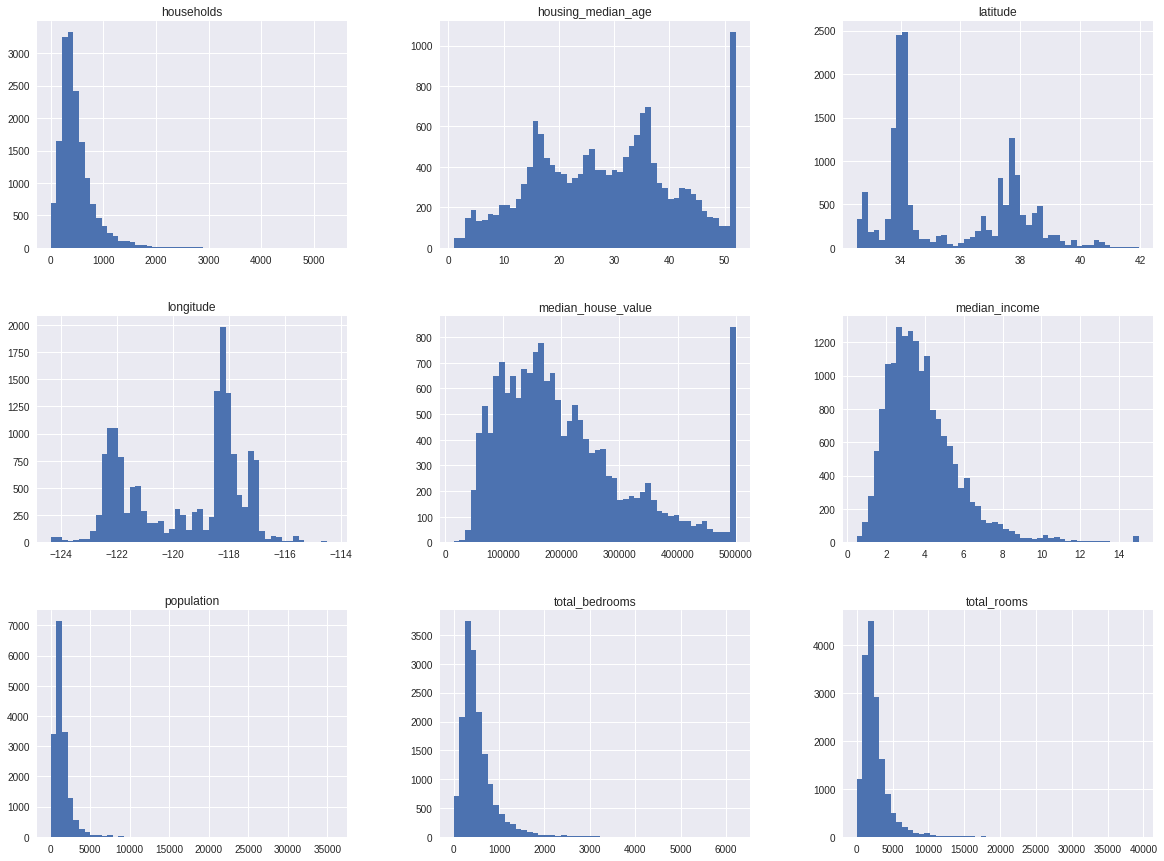

In [0]:
# some_df.some_feature.value_counts() shows you all types of values for that feature
_ = housing.hist(figsize=(20, 15), bins=50)
housing.head()

## Split data into training / test

In [0]:
# Could split randomly with an sklearn function like so...  
  # train_df, test_df = train_test_split(housing, test_size=0.2, random_state=42)

# We will split with stratified sampling based on income, because very strong attribute of prediction
def split_train_test(data, ratio, random_state):
  data["income_cat"] = np.ceil(housing["median_income"] / 1.5)
  data["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
  split = StratifiedShuffleSplit(n_splits=1, test_size=ratio, random_state=random_state)
  for train_i, test_i in split.split(housing, housing["income_cat"]):
    train_df = housing.loc[train_i]
    test_df = housing.loc[test_i]
  del train_df["income_cat"]
  del test_df["income_cat"]
  return train_df, test_df

train_df, test_df = split_train_test(housing, 0.2, 42)

## Discover and visualize data

In [0]:
housing = train_df.copy()

In [0]:
### Sample lines to understand data

# housing.head()
# housing.describe()
# housing.info()


### Sample blocks to visualize data

# _ = housing.hist(figsize=(20, 15), bins=50)

# _ = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
#                 s=housing["population"]/100, label="population", # s defines radius of each circle, based on population in this case
#                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # c defines color of circle, based on median house value in this case

# corr_matrix = housing.corr()
# corr_matrix.median_house_value.sort_values(ascending=False)
# attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# _ = scatter_matrix(housing[attributes], figsize=(12, 8))
# _ = housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

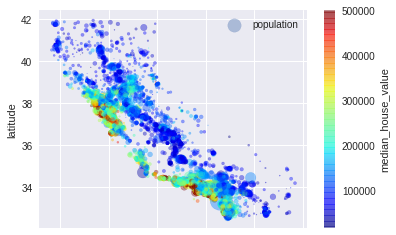

In [0]:
# Geographic data, so lets visualize this
_ = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                s=housing["population"]/100, label="population", # s defines radius of each circle, based on population in this case
                c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # c defines color of circle, based on median house value in this case

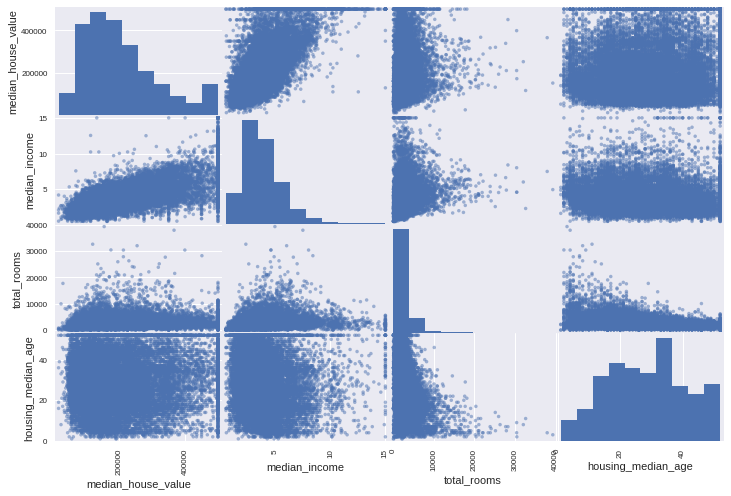

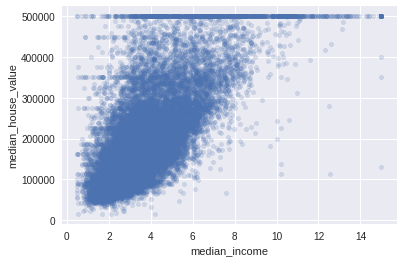

In [0]:
# lets look for correlations
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(12, 8))
_ = housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

In [0]:
# And try adding a few intuitive synthetic features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64